In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
from metaspace.sm_annotation_utils import SMInstance


This notebook illustrates how to pull ion images for annotations from the [METASPACE platform](annotate.metaspace2020.eu). It will obtain and display all the isotope images for a set of annotations

In [2]:
# Choose the dataset name to get isotope images for
ds_name = 'Brain01_Bregma1-42_01'

In [3]:
sm = SMInstance()
d = sm.dataset(ds_name)
results = sm.msm_scores([d], d.annotations()).T.sort_values(by=ds_name, ascending=False)
results.head()

,ds_name,Brain01_Bregma1-42_01
sf,adduct,
C40H80NO8P,+Na,0.973544
C37H71O8P,+K,0.970884
C40H80NO8P,+H,0.939462
C41H82NO8P,+H,0.926313
C41H83N2O6P,+Na,0.904083


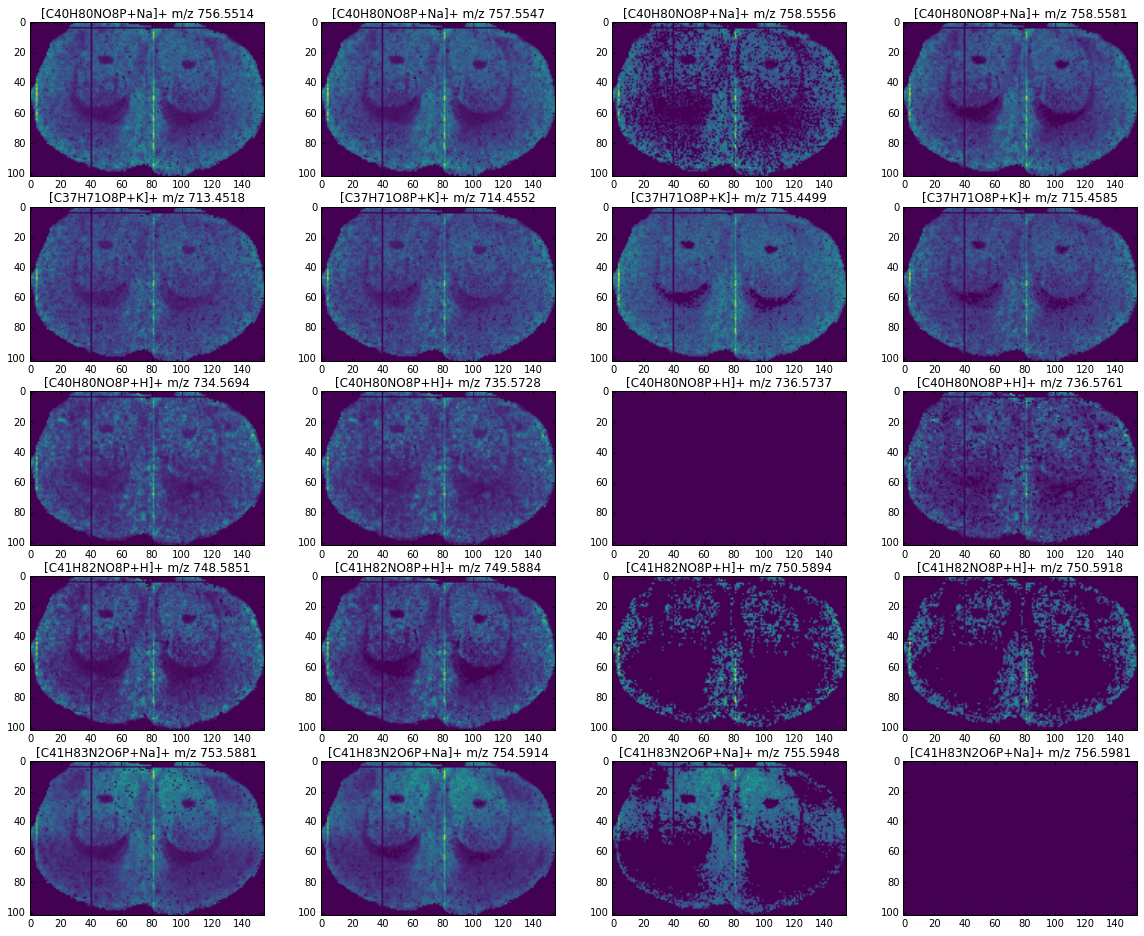

In [4]:
limit = 5 # number of annotations to get
plt.figure(figsize=(20, 16))
for ii in range(limit):
    row = results.iloc[ii]
    (sf, adduct) = row.name
    images = d.isotope_images(sf, adduct)
    for j, im in enumerate(images):
        plt.subplot(limit, 4, ii * 4 + j + 1)
        plt.title("[{}{}]+ m/z {}".format(sf, adduct, images.peak(index=j)))
        plt.imshow(images[j], cmap='viridis')
plt.show()